# Section 3 - Kernel Density Estimation (KDE) and Least Squares
You should have downloaded:
- wings.csv
- housing.csv

# 1 Least Squares
Let's learn to use the sklearn package for least squares linear regression.
## 1.1 Load data

In [2]:
######## DO NOT CHANGE THIS CODE ##########
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("housing.csv")

# extract price and lotsize columns as np arrays
X, y =  np.array(df['lotsize']), np.array(df['price'])

# print the shapes of X and Y
print(X.shape); print(y.shape)
###########################################

(546,)
(546,)


## 1.2 Split data into training and testing
**Task:** 
1. Create new numpy column arrays called `X_train, X_test, y_train, y_test`, where:
    - you use train_test_split() function from sklearn.model_selection
    - the training dataset contains the 70% of samples
    - the testing dataset contains the 30% of samples
    - random state set to 0.
2. Check the dimensions/size of each array and make sure the train-test split is doing what its expected to do. 
3. Discuss: what other code can you write to verify that the split is indeed randomized and not the original ordering of the given dataset?


In [3]:
# TODO split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('X_train: ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test : ', y_test.shape)

X_train:  (382,)
X_test :  (164,)
y_train:  (382,)
y_test :  (164,)


## 1.3 Perform linear regression
Suppose we model housing price $Y$ by the variable $X$ lot size using the linear model
$$
Y = aX+b,
$$
where $a$ and $b$ are coefficients to be determined.

**Task:** By looking at the documentation for sklearn.linear_model.LinearRegresson, learn how to:
- create a LinearRegression() object/model,
- fit the model to the training data (You may need to reshape the data to column arrays by .reshape(-1,1)),
- extract coefficients $a$ and $b$, and then print them.

In [4]:
from sklearn.linear_model import LinearRegression

# TODO sklearn linear regression model and fit data
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

# TODO extract coefficients
a = reg.coef_
b = reg.intercept_

# TODO print coefficients
print('a = ', a[0,0])
print('b = ', b[0])

a =  7.446910160908259
b =  29363.804930288527


## Manual Linear Regression by Summation

Recall: $$\beta_{i}  = \frac{\sum(x_{i}-\bar{x})(y_{i} - \bar{y})}{\sum(x_{i} - \bar{x})^2}$$ \
        $$\hat{\beta}_{0} = \bar{y}-\bar{\beta}_{1}\hat{x}$$

In [30]:
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)
n = len(X_train)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X_train[i] - X_mean) * (y_train[i] - y_mean)
    denominator += (X_train[i] - X_mean)**2

# Or alternatively:
# num = np.sum(((X_train - X_mean) *  (y_train-y_mean)))
# den = np.sum((X_train - X_mean)**2)
# beta1 = num/den

beta1 = numerator / denominator
beta0 = y_mean - (beta1*X_mean)

print("a =", beta1)
print("b =", beta0)

a = 7.446910160908254
b = 29363.804930288556


# 2 KDE
## 2.1 Intro and Data
The following exercise is based on Tarn Duong, ["An Introduction to Kernel Density Estimation."](https://www.mvstat.net/tduong/research/seminars/seminar-2001-05/) 

**Task**:
Run the code in the next cell, which loads a sample of the log wingspans of aircraft built from 1956 to 1984 (original wingspans were in meters). 
- Assume the data are sampled from a continuous distribution with a **bimodal** density, where the peaks in the density represent the modal log wingspans of small and large aircraft respectively.

In [10]:
import numpy as np
wings = np.loadtxt('wings.csv', delimiter=',')

## 2.2 Density estimation via histograms
Histograms are dependent on bin width as well as bin boundaries. 

Varying either of these can obscure features of the distribution from which a sample is drawn. We may gain or lose the appearance of bimodality.
    
**Task:**
On separate figures:
- Plot a histogram of the data using bins of width 0.50, where the first bin is [1.00, 1.50).
- Plot a histogram of the data using bins of width 0.50, where the first bin is [1.25, 1.75).

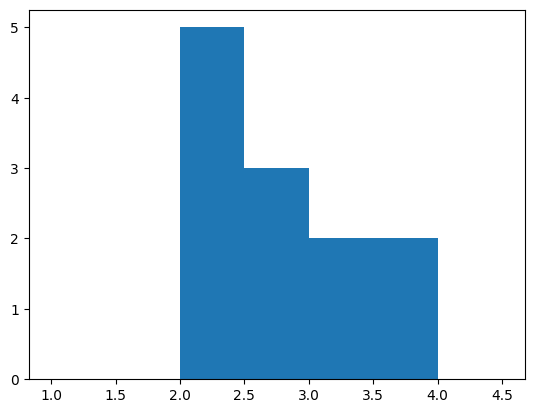

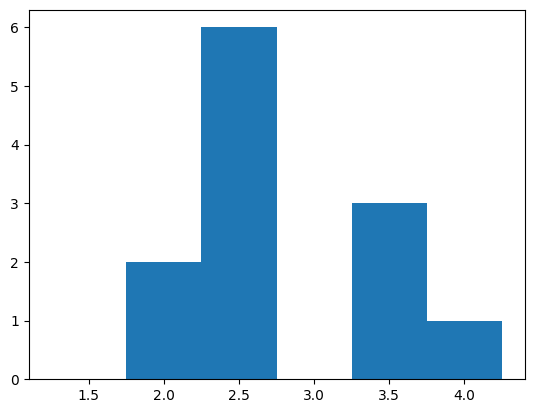

In [11]:
import matplotlib.pyplot as plt

# Histogram. Note the use of numpy.arange().
plt.hist(x=wings, bins=np.arange(1.00, 5.00, 0.50))
plt.show()
plt.hist(x=wings, bins=np.arange(1.25, 4.75, 0.50))
plt.show()

### How does kernel density estimation work? 
- Read [Wikipedia: Kernel density estimation - Definition](https://en.wikipedia.org/wiki/Kernel_density_estimation#Definition)
- A useful formula for the estimate of the density is $$\hat{f_h}(x) = \frac{1}{nh} \sum_{i=1}^n K(\frac{x-x_i}{h}),$$ where $h$ is the bandwidth and $K(\cdot)$ is the kernel function. 
- Advantage of kernel density estimation: it does not depend on bin boundaries. It does however depend on bandwidth, which is an analogue of bin width.

## 2.3 Density estimation via KDE (Uniform kernel)
**Task:**
- Write a function `ukde`, which returns a uniform kernel density estimate given:
    - a vector of points on the x-axis `x` (the axis of the density)
    - a vector of data `data` and 
    - a bandwidth `h`. 
Your kernel function $K$ should be the density function of the uniform distribution on $[-1,1]$.
- Plot the KDE with uniform kernel for x in the range [1,5]
    - Find a bandwidth `bw` that makes bimodality apparent and plot the results. State where the two modes appear to be.
- Check that the density estimate integrates to 1 (closer to 1 if number of point on x-axis goes to infinity).

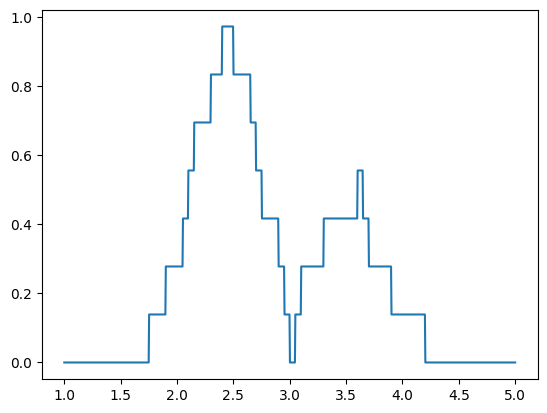

area under KDE: 1.001001001001001


/var/folders/1f/42xf8l2j16vf9d3jbnl_m49m0000gn/T/ipykernel_22765/1765159145.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print('area under KDE:', np.trapz(ukde(x, wings, bw), x))


In [12]:
import scipy.stats as stat

# This takes a sum of uniform PDF's that are scaled and centered according to the bandwidth and datapoints.
# x: Points at which to evaluate the density estimate.
# data: Points on which to base the density estimate.
# h: Bandwidth.
def ukde(x, data, h):
    n = len(data)
    f = np.zeros(len(x))
    for j in range(len(x)):
        f[j] = (1/(n*h)) * np.sum(stat.uniform.pdf((x[j] - data)/bw, loc=-1, scale=2))
    return f

# # Or, here is a compact way:
# def ukde(x, data, h):
#     n = len(data)
#     K = [stat.uniform.pdf((x - data[i])/bw, loc=-1, scale=2) for i in range(len(data))] # make a 2D array for all x and x_i
#     f = (1/(n*h)) * np.sum(K, axis=0)
#     return f
        
    

# Plot.
x = np.linspace(1,5,1000)
bw = 0.3
plt.plot(x, ukde(x, wings, bw))
plt.show()
# Modes around 2.5 and 3.5.

# Check that the density estimate integrates to 1
print('area under KDE:', np.trapz(ukde(x, wings, bw), x))

# 2.4 Density estimation via KDE (Gaussian kernel)

Now, instead of uniform kernels, try Gaussian (i.e., normal distribution) kernels. 
- Advantage of Gaussian kernels over uniform kernels: smoother estimated density curve.

**Task:**
- Write function `gkde` that returns a Gaussian kernel density estimate given:
    - a vector of points on the x-axis `x` (the axis of the density)
    - a vector of data `data` and 
    - a bandwidth `h`. 
Your kernel function $K$ should be the density function of the standard normal distribution.
- Plot the KDE with Gaussian kernel for x in the range [1,5]
    - Find a bandwidth `bw` that makes bimodality apparent and plot the results. State where the two modes appear to be.
- Check that the density estimate integrates to 1 (closer to 1 if number of point on x-axis goes to infinity).

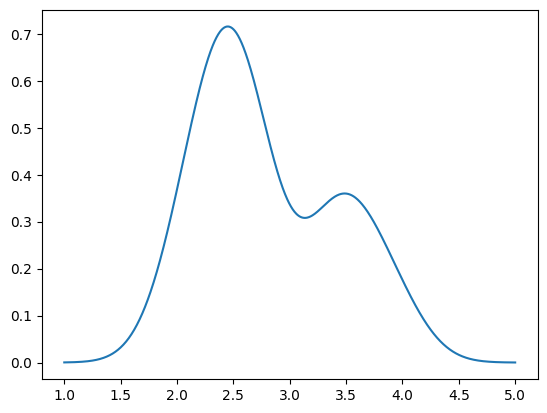

area under KDE: 0.9999671232931843


/var/folders/1f/42xf8l2j16vf9d3jbnl_m49m0000gn/T/ipykernel_22765/1190597447.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print('area under KDE:', np.trapz(gkde(x, wings, bw), x))


In [13]:
# Gaussian kernel density estimation.
def gkde(x, data, h):
    n = len(data)
    f = np.zeros(len(x))
    for j in range(len(x)):
        f[j] = (1/(n*h)) * np.sum(stat.norm.pdf((x[j] - data)/bw))
    return f

# # Or, here is a compact way:
# def gkde(x, data, h):
#     n = len(data)
#     K = [stat.norm.pdf((x - data[i])/bw) for i in range(len(data))] # make a 2D array for all x and x_i
#     f = (1/(n*h)) * np.sum(K, axis=0)
#     return f

#2 Plot
x = np.linspace(1,5,1000)
bw = 0.3
plt.plot(x, gkde(x, wings, bw))
plt.show()
# Modes around 2.5 and 3.5.

# Check that the density estimate integrates to 1.
print('area under KDE:', np.trapz(gkde(x, wings, bw), x))